### Numpy basics

In [1]:
import numpy as np
import time
import math
import matplotlib.pyplot as plt
%matplotlib notebook

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [1]:
m = np.arange(12).reshape((3,4))
print([np.mean(row) for row in m[:]])
print([np.mean(m[:,i]) for i in range(m.shape[1])])
print(np.mean(m))

[1.5, 5.5, 9.5]
[4.0, 5.0, 6.0, 7.0]
5.5


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [35]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

print(np.outer(u,v))

product = np.zeros((len(u),len(v)), dtype = int)
for index_u, i in enumerate(u):
    for index_j, j in enumerate(v):
        product[index_u,index_j]=i*j
print(product)

product = np.array([u*j for j in v])
print(product)

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  6 10 14]
 [ 4 12 20 28]
 [ 6 18 30 42]
 [ 8 24 40 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [43]:
np.random.seed(1)        

uniform = np.random.uniform(size = (10,6)) # 4 random numbers in [0,1]
uniform[uniform < 0.1] = 0

print(uniform)

[[0.417022   0.72032449 0.         0.30233257 0.14675589 0.        ]
 [0.18626021 0.34556073 0.39676747 0.53881673 0.41919451 0.6852195 ]
 [0.20445225 0.87811744 0.         0.67046751 0.4173048  0.55868983]
 [0.14038694 0.19810149 0.80074457 0.96826158 0.31342418 0.69232262]
 [0.87638915 0.89460666 0.         0.         0.16983042 0.8781425 ]
 [0.         0.42110763 0.95788953 0.53316528 0.69187711 0.31551563]
 [0.68650093 0.83462567 0.         0.75014431 0.98886109 0.74816565]
 [0.28044399 0.78927933 0.10322601 0.44789353 0.9085955  0.29361415]
 [0.28777534 0.13002857 0.         0.67883553 0.21162812 0.26554666]
 [0.49157316 0.         0.57411761 0.14672857 0.58930554 0.69975836]]


4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

[0.31733259 0.63466518 0.95199777 1.26933037 1.58666296 1.90399555
 2.22132814 2.53866073 2.85599332]
[2.85599332 2.53866073 2.22132814 1.90399555 1.58666296 1.26933037
 0.95199777 0.63466518]


<IPython.core.display.Javascript object>


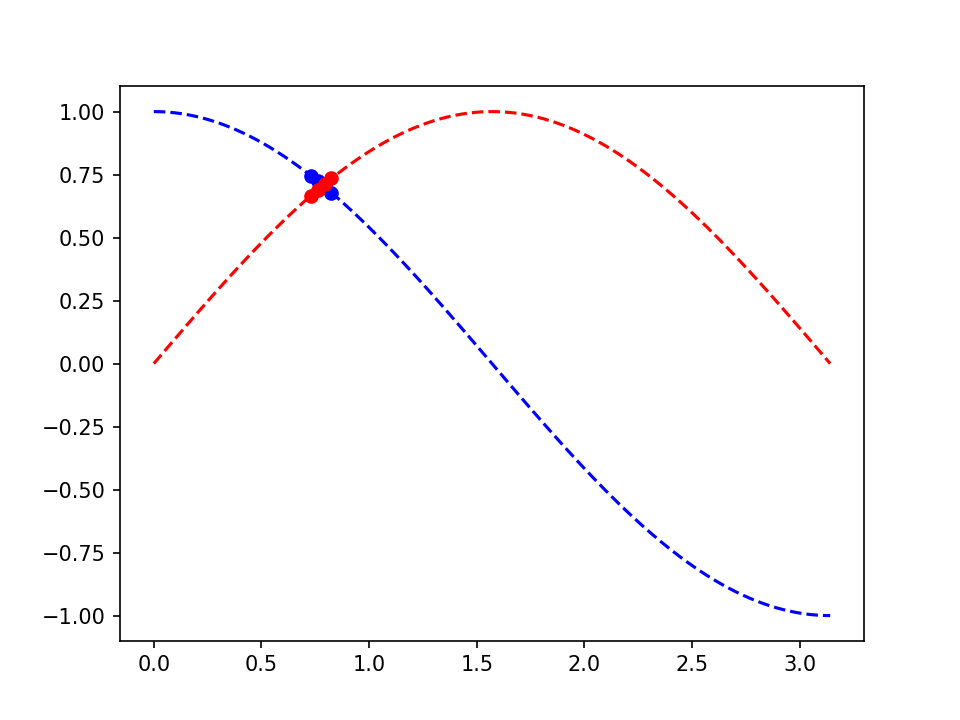

In [61]:
space = np.linspace(0,np.pi,100)
extracted = space[10:100:10]
print(extracted)
reverse = extracted[-1:0:-1]
print(reverse)

sin = np.sin(space)
cosin = np.cos(space)
diff = np.abs(sin-cosin)
diff = diff<0.1

plt.figure()
plt.plot(space,cosin, 'b--', space, sin, 'r--', space[diff], cosin[diff], 'bo', space[diff], sin[diff],  'ro')
plt.show()

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [3]:
a = np.arange(1,11)
table = np.outer(a,a)
anti_diag = np.diag(np.fliplr(table))
diag_off1 = np.diag(table, 1)
print(anti_diag)
print(diag_off1)

[10 18 24 28 30 30 28 24 18 10]
[ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [2]:
distances = np.array([[0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448]])

for i in distances[0]:
    if i != 0:
        distances = np.vstack([distances, distances[0]-i])

distances = np.abs(distances)

toKm = 1.609344
distances = np.array(distances, dtype = float) * toKm
print(distances)

[[   0.        318.650112  487.631232 1184.477184 1401.738624 1890.9792
  2373.7824   2484.827136 3078.675072 3939.674112]
 [ 318.650112    0.        168.98112   865.827072 1083.088512 1572.329088
  2055.132288 2166.177024 2760.02496  3621.024   ]
 [ 487.631232  168.98112     0.        696.845952  914.107392 1403.347968
  1886.151168 1997.195904 2591.04384  3452.04288 ]
 [1184.477184  865.827072  696.845952    0.        217.26144   706.502016
  1189.305216 1300.349952 1894.197888 2755.196928]
 [1401.738624 1083.088512  914.107392  217.26144     0.        489.240576
   972.043776 1083.088512 1676.936448 2537.935488]
 [1890.9792   1572.329088 1403.347968  706.502016  489.240576    0.
   482.8032    593.847936 1187.695872 2048.694912]
 [2373.7824   2055.132288 1886.151168 1189.305216  972.043776  482.8032
     0.        111.044736  704.892672 1565.891712]
 [2484.827136 2166.177024 1997.195904 1300.349952 1083.088512  593.847936
   111.044736    0.        593.847936 1454.846976]
 [3078.675

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [4]:
def primes(n):
    mask = np.ones(n, dtype = bool)
    for index in range(2, math.ceil(math.sqrt(len(mask)))):
        for index2 in range(index+1, len(mask)):
            if mask[index2] and index2%index == 0:
                mask[index2] = False
    return np.linspace(0, n-1, n, dtype = int)[mask]

for n in [10**i for i in np.arange(5)]:
    %timeit primes(n)

19 µs ± 586 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
27.4 µs ± 2.92 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
119 µs ± 15.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
3.38 ms ± 62.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
111 ms ± 9.84 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [3]:
import math
def eratosthenes(n):
    mask = np.ones(n, dtype = bool)
    for i in range(2, math.ceil(math.sqrt(len(mask)))):
        if mask[i]:
            j = i**2
            while(True):
                try:
                    mask[j] = False
                    j += i
                except:
                    break
    return np.linspace(0, n-1, n, dtype = int)[mask]
for n in [10**i for i in np.arange(5)]:
    %timeit eratosthenes(n)

21.9 µs ± 3.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
28 µs ± 3.22 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
42.7 µs ± 255 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
246 µs ± 2.81 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.62 ms ± 121 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

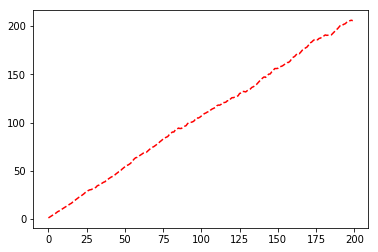

In [135]:
np.random.seed(1)
walkers = np.random.randint(2, size = (1000,200))
choices = [-1,1]
walkers = np.choose(walkers, choices)
walkers = np.cumsum(walkers, axis = 1)
walkers = walkers*walkers
means = np.mean(walkers, axis = 0)
plt.figure()
plt.plot(means, 'r--')
plt.show()

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

<IPython.core.display.Javascript object>


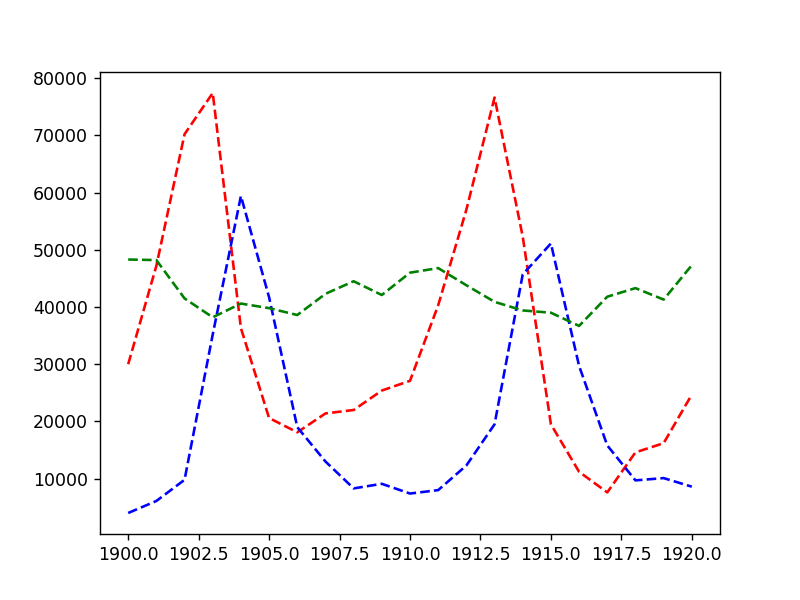

Hares
sum 715700.0
min 7600.0
max 77400.0
mean 34080.95238095238
median 25400.0
std 20897.906458089667


Lynxes
sum 423500.0
min 4000.0
max 59400.0
mean 20166.666666666668
median 12300.0
std 16254.591536908763


Carrots
sum 890400.0
min 36700.0
max 48300.0
mean 42400.0
median 41800.0
std 3322.5062255844787




<IPython.core.display.Javascript object>


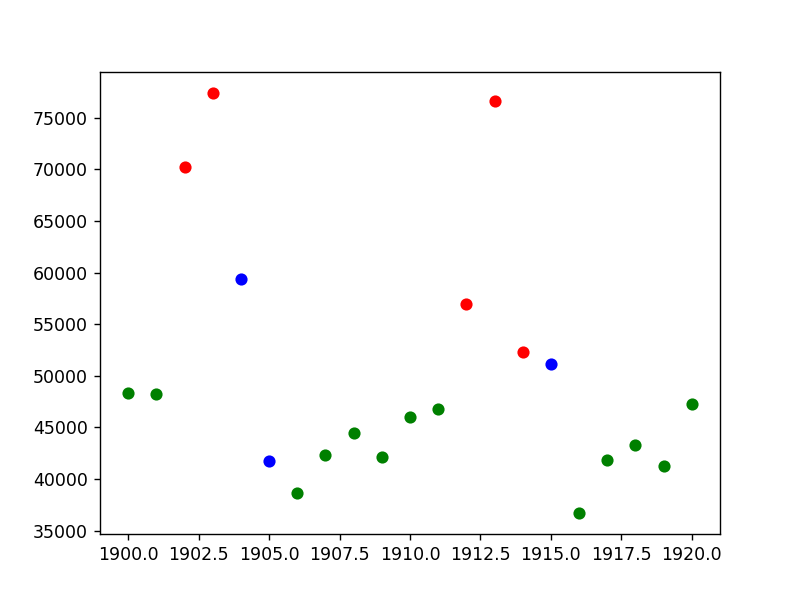

In [12]:
#! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt --no-check-certificate
loaded = np.loadtxt('populations.txt', skiprows=0)
years, hares, lynxes, carrots = loaded.T
plt.figure()
plt.plot( years,hares, 'r--',  years,lynxes, 'b--', years,carrots,'g--')
plt.show()
dic = {'Hares':hares, 'Lynxes':lynxes, 'Carrots':carrots}
for key in dic:
    print(key)
    for function in ['sum','min','max','mean','median','std']:
        print (function, getattr(np, function)(dic[key]))
    print('\n')
mask_hares = np.logical_and(hares > lynxes, hares > carrots)
mask_lynxes = np.logical_and(lynxes > hares, lynxes > carrots)
mask_carrots = np.logical_and(carrots > lynxes, carrots > hares)

plt.figure()
plt.plot( years[mask_hares],hares[mask_hares], 'ro',  years[mask_lynxes],lynxes[mask_lynxes],
         'bo', years[mask_carrots],carrots[mask_carrots],'go')
plt.show()